# Fashion MNIST 
 
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"  height='300' width='500'/>
 
 
Fashion MNIST is a collection of 28x28 images containing 70,000 grayscale images in 10 categories. In this notebook we will analyze this dataset using two diferent neural networks: a fully connected network and a convolutional network.

## Fully Connected Network

In [1]:
# imports for array-handling and plotting
%matplotlib inline

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt

# fix random seed for reproducibility
np.random.seed(10)

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils


In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import fashion_mnist

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 2s 1us/step


In [4]:
## Show the dimentions of the data
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
y_train[0:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

<BarContainer object of 10 artists>

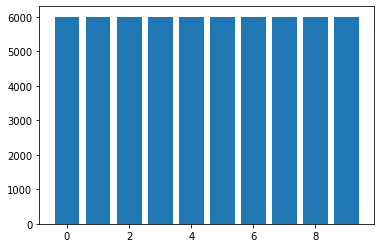

In [7]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

## plot the frequency of y's
plt.bar(yn[0],yn[1])

We now check the first nine data rows (pictures) and check their labels:

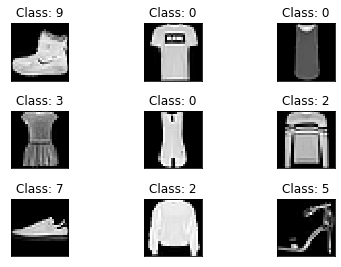

In [9]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
<code> 
Label	Class
0	    T-shirt/top
1	    Trouser
2	    Pullover
3	    Dress
4	    Coat
5	    Sandal
6	    Shirt
7	    Sneaker
8	    Bag
9	    Ankle boot
</code> 
Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:               

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

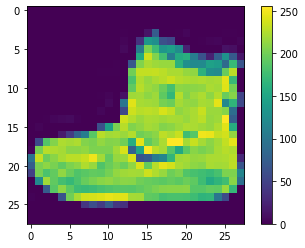

In [15]:
### images have values between 0 and 255

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

In [16]:
# normalizing the data to help with the training
X_train = X_train / 255
X_test = X_test / 255

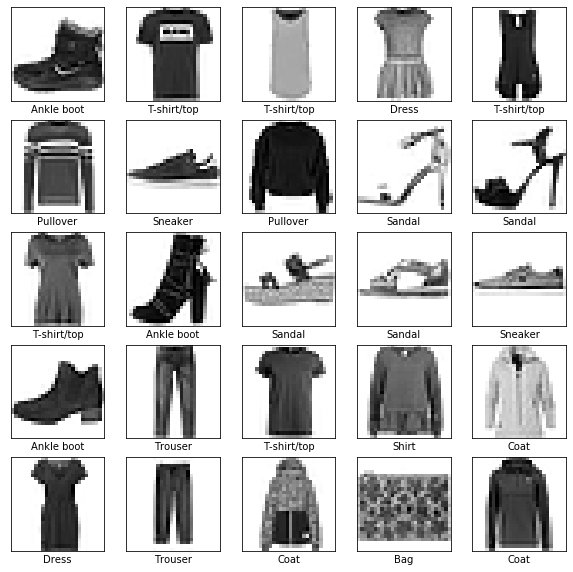

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])


Before procedding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [20]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### First model based on Categorical Crossentropy as loss function

Now we will compile the model

Now we will proceed to build the network architecture. Our input layer consist on:

 1. A two dimentional matrix of 28x28. We will use a flatten layer as the first layer, what gives a layer with 784 nodes. 
 2. Then we will use a fully connected layer (dense) with 128 nodes, followed with a relu  activation layer. 
 3. Then another fully connected layer of 10 nodes, activated with a softmax layer. 
 4. The output layer consist of 10 nodes.

In [22]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))


In [24]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
activation (Activation)      (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
__________________________________________________

and fit it...

In [25]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 2s - loss: 0.5601 - accuracy: 0.8086 - val_loss: 0.4575 - val_accuracy: 0.8388
Epoch 2/20
469/469 - 2s - loss: 0.4060 - accuracy: 0.8564 - val_loss: 0.4106 - val_accuracy: 0.8568
Epoch 3/20
469/469 - 2s - loss: 0.3655 - accuracy: 0.8697 - val_loss: 0.4045 - val_accuracy: 0.8548
Epoch 4/20
469/469 - 2s - loss: 0.3404 - accuracy: 0.8785 - val_loss: 0.3706 - val_accuracy: 0.8692
Epoch 5/20
469/469 - 2s - loss: 0.3190 - accuracy: 0.8843 - val_loss: 0.3629 - val_accuracy: 0.8687
Epoch 6/20
469/469 - 2s - loss: 0.3060 - accuracy: 0.8900 - val_loss: 0.3621 - val_accuracy: 0.8700
Epoch 7/20
469/469 - 2s - loss: 0.2885 - accuracy: 0.8965 - val_loss: 0.3450 - val_accuracy: 0.8775
Epoch 8/20
469/469 - 2s - loss: 0.2794 - accuracy: 0.8987 - val_loss: 0.3466 - val_accuracy: 0.8761
Epoch 9/20
469/469 - 2s - loss: 0.2691 - accuracy: 0.9010 - val_loss: 0.3364 - val_accuracy: 0.8823
Epoch 10/20
469/469 - 2s - loss: 0.2623 - accuracy: 0.9032 - val_loss: 0.3283 - val_accuracy: 0.8844

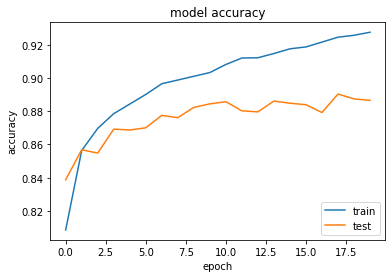

In [26]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

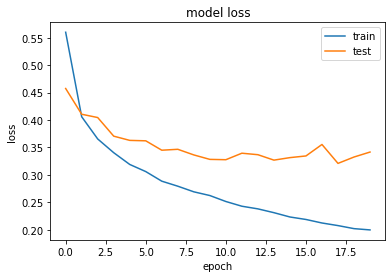

In [28]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


### Second model based on Sparse Categorical Crossentropy as loss function


In [29]:
# compiling the sequential model
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
##### here we use the labels without one-hot-encoding !!!

res = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/20
469/469 - 2s - loss: 0.1946 - accuracy: 0.9281 - val_loss: 0.3274 - val_accuracy: 0.8876
Epoch 2/20
469/469 - 3s - loss: 0.1894 - accuracy: 0.9300 - val_loss: 0.3329 - val_accuracy: 0.8876
Epoch 3/20
469/469 - 2s - loss: 0.1860 - accuracy: 0.9319 - val_loss: 0.3276 - val_accuracy: 0.8883
Epoch 4/20
469/469 - 2s - loss: 0.1788 - accuracy: 0.9341 - val_loss: 0.3263 - val_accuracy: 0.8906
Epoch 5/20
469/469 - 2s - loss: 0.1776 - accuracy: 0.9354 - val_loss: 0.3389 - val_accuracy: 0.8888
Epoch 6/20
469/469 - 2s - loss: 0.1730 - accuracy: 0.9364 - val_loss: 0.3571 - val_accuracy: 0.8855
Epoch 7/20
469/469 - 2s - loss: 0.1707 - accuracy: 0.9378 - val_loss: 0.3472 - val_accuracy: 0.8883
Epoch 8/20
469/469 - 2s - loss: 0.1654 - accuracy: 0.9390 - val_loss: 0.3531 - val_accuracy: 0.8874
Epoch 9/20
469/469 - 2s - loss: 0.1665 - accuracy: 0.9398 - val_loss: 0.3466 - val_accuracy: 0.8901
Epoch 10/20
469/469 - 2s - loss: 0.1573 - accuracy: 0.9423 - val_loss: 0.3429 - val_accuracy: 0.8889

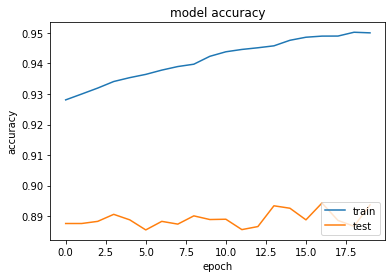

In [32]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

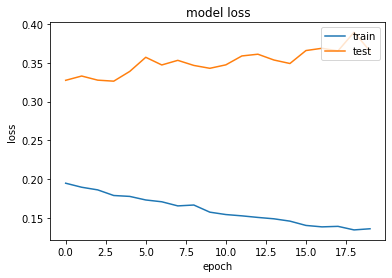

In [33]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


##  Third model - now we will add dropout layers

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [37]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
activation_9 (Activation)    (None, 784)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [39]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 3s - loss: 0.6615 - accuracy: 0.7659 - val_loss: 0.4698 - val_accuracy: 0.8322
Epoch 2/20
469/469 - 3s - loss: 0.4843 - accuracy: 0.8245 - val_loss: 0.4160 - val_accuracy: 0.8524
Epoch 3/20
469/469 - 3s - loss: 0.4424 - accuracy: 0.8390 - val_loss: 0.4085 - val_accuracy: 0.8551
Epoch 4/20
469/469 - 3s - loss: 0.4248 - accuracy: 0.8451 - val_loss: 0.3965 - val_accuracy: 0.8574
Epoch 5/20
469/469 - 3s - loss: 0.4055 - accuracy: 0.8510 - val_loss: 0.3728 - val_accuracy: 0.8657
Epoch 6/20
469/469 - 3s - loss: 0.3958 - accuracy: 0.8538 - val_loss: 0.3911 - val_accuracy: 0.8584
Epoch 7/20
469/469 - 3s - loss: 0.3829 - accuracy: 0.8582 - val_loss: 0.3614 - val_accuracy: 0.8704
Epoch 8/20
469/469 - 3s - loss: 0.3766 - accuracy: 0.8612 - val_loss: 0.3632 - val_accuracy: 0.8685
Epoch 9/20
469/469 - 3s - loss: 0.3672 - accuracy: 0.8651 - val_loss: 0.3516 - val_accuracy: 0.8704
Epoch 10/20
469/469 - 3s - loss: 0.3647 - accuracy: 0.8651 - val_loss: 0.3596 - val_accuracy: 0.8688

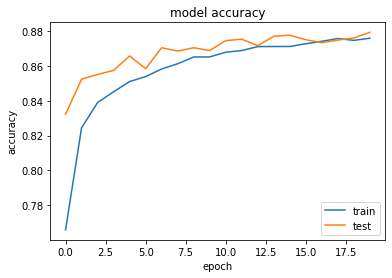

In [40]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

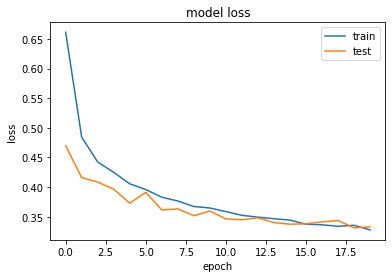

In [41]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fourth model - Additional layer



In [43]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Activation('relu'))                            

model.add(Dropout(0.20))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.30))

model.add(Dense(10))
model.add(Activation('softmax'))


In [44]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
activation_16 (Activation)   (None, 784)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [46]:
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 3s - loss: 0.7500 - accuracy: 0.7312 - val_loss: 0.4889 - val_accuracy: 0.8160
Epoch 2/20
469/469 - 3s - loss: 0.5177 - accuracy: 0.8138 - val_loss: 0.4210 - val_accuracy: 0.8449
Epoch 3/20
469/469 - 3s - loss: 0.4661 - accuracy: 0.8316 - val_loss: 0.3992 - val_accuracy: 0.8528
Epoch 4/20
469/469 - 3s - loss: 0.4431 - accuracy: 0.8408 - val_loss: 0.3865 - val_accuracy: 0.8616
Epoch 5/20
469/469 - 3s - loss: 0.4239 - accuracy: 0.8461 - val_loss: 0.3854 - val_accuracy: 0.8572
Epoch 6/20
469/469 - 3s - loss: 0.4082 - accuracy: 0.8509 - val_loss: 0.3678 - val_accuracy: 0.8666
Epoch 7/20
469/469 - 3s - loss: 0.3994 - accuracy: 0.8547 - val_loss: 0.3619 - val_accuracy: 0.8663
Epoch 8/20
469/469 - 3s - loss: 0.3916 - accuracy: 0.8578 - val_loss: 0.3530 - val_accuracy: 0.8691
Epoch 9/20
469/469 - 3s - loss: 0.3844 - accuracy: 0.8593 - val_loss: 0.3517 - val_accuracy: 0.8725
Epoch 10/20
469/469 - 3s - loss: 0.3751 - accuracy: 0.8627 - val_loss: 0.3519 - val_accuracy: 0.8698

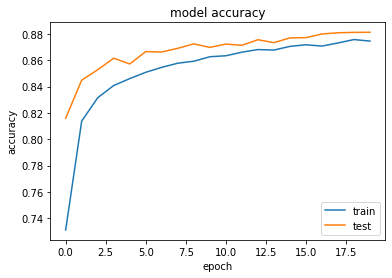

In [47]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

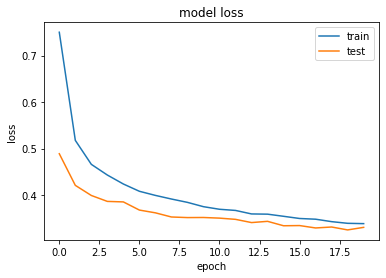

In [48]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Fifth model - Convolutional Neural Networks


In [35]:
## data preprocessing

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


In [36]:
model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1),padding='same',activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())
          
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [38]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)        

In [41]:
res = model.fit(X_train, Y_train,
          batch_size=1000, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
60/60 - 33s - loss: 1.1974 - accuracy: 0.5562 - val_loss: 0.6829 - val_accuracy: 0.7476
Epoch 2/20
60/60 - 38s - loss: 0.6470 - accuracy: 0.7563 - val_loss: 0.5386 - val_accuracy: 0.7969
Epoch 3/20
60/60 - 37s - loss: 0.5451 - accuracy: 0.7969 - val_loss: 0.4618 - val_accuracy: 0.8352
Epoch 4/20
60/60 - 37s - loss: 0.4823 - accuracy: 0.8247 - val_loss: 0.4172 - val_accuracy: 0.8506
Epoch 5/20
60/60 - 37s - loss: 0.4413 - accuracy: 0.8397 - val_loss: 0.3789 - val_accuracy: 0.8652
Epoch 6/20
60/60 - 37s - loss: 0.4150 - accuracy: 0.8490 - val_loss: 0.3611 - val_accuracy: 0.8694
Epoch 7/20
60/60 - 37s - loss: 0.3914 - accuracy: 0.8568 - val_loss: 0.3486 - val_accuracy: 0.8748
Epoch 8/20
60/60 - 37s - loss: 0.3715 - accuracy: 0.8646 - val_loss: 0.3306 - val_accuracy: 0.8803
Epoch 9/20
60/60 - 37s - loss: 0.3647 - accuracy: 0.8648 - val_loss: 0.3190 - val_accuracy: 0.8857
Epoch 10/20
60/60 - 37s - loss: 0.3463 - accuracy: 0.8719 - val_loss: 0.3074 - val_accuracy: 0.8894
Epoch 11/

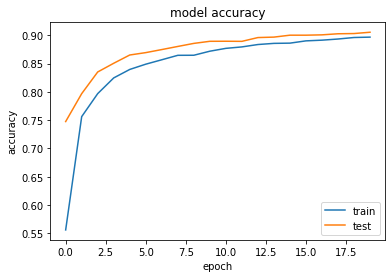

In [42]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

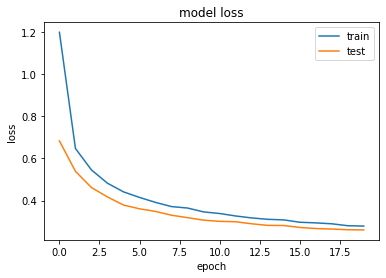

In [43]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [44]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(14,14))
    labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{} | Pred:{}".format(labels[y_test[indx]],labels[predicted_classes[indx]]))
    plt.show()    

In [45]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [47]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9054
Incorrect predicted classes: 946


In [48]:
from sklearn.metrics import classification_report
#target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.89      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.84      0.83      0.84      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.68      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



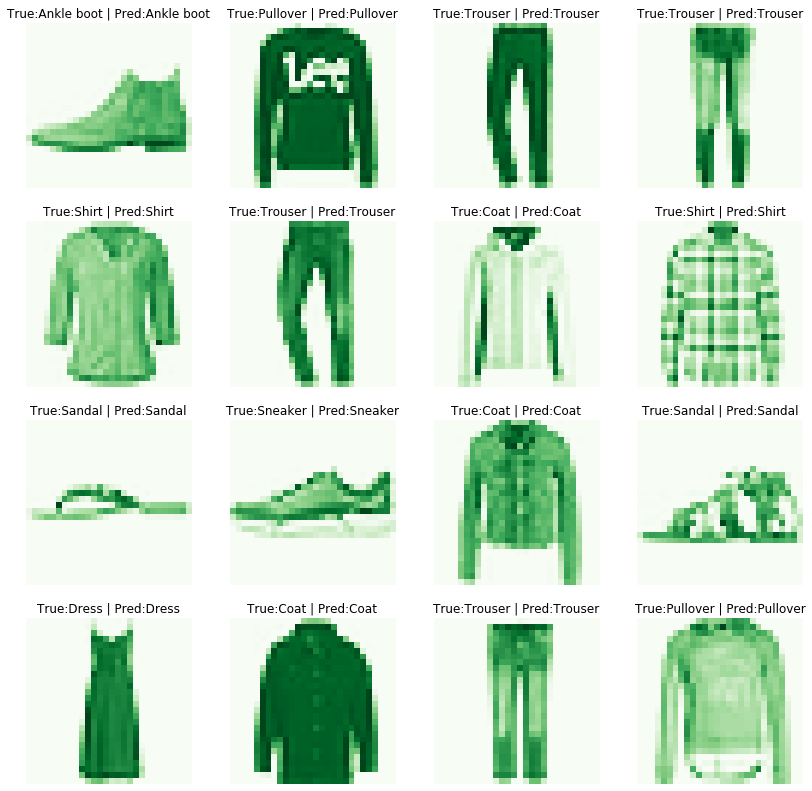

In [49]:
plot_images(correct, "Greens")

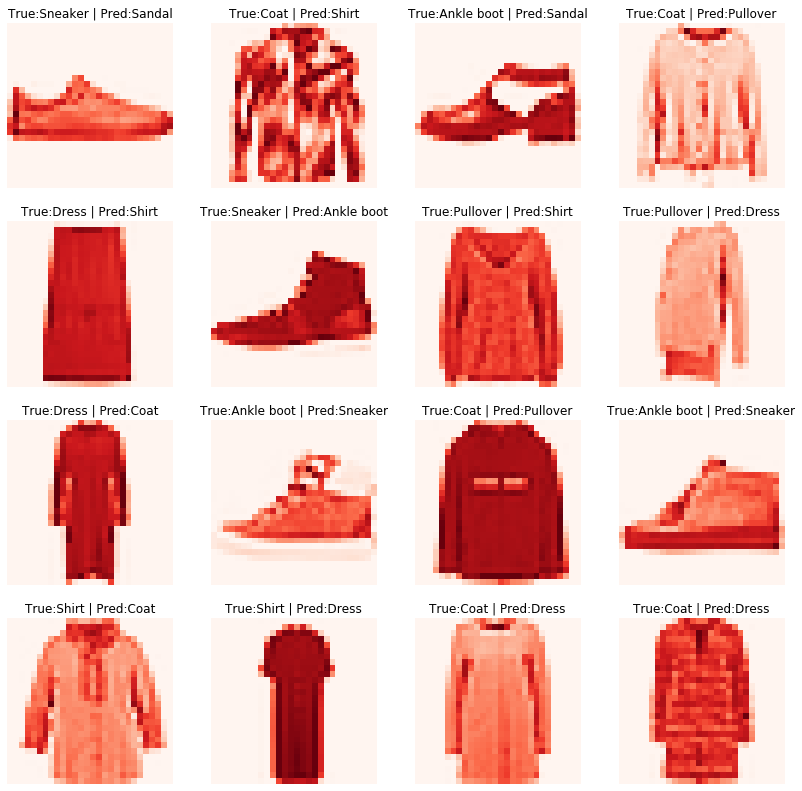

In [50]:
plot_images(incorrect, "Reds")